In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize

In [18]:
# Fetch Adult dataset
adult = fetch_openml(name='adult', version=1, parser='auto')

# Data (as pandas DataFrame)
data = pd.DataFrame(adult.data, columns=adult.feature_names)
data['income'] = adult.target

In [19]:
# Data Preprocessing
# Fill missing values with the mean for numeric columns
data_numeric = data.select_dtypes(include='number')
data_numeric_filled = data_numeric.fillna(data_numeric.mean())

# Fill missing values with the mode for categorical columns
data_categorical = data.select_dtypes(exclude='number')
data_categorical_filled = data_categorical.apply(lambda x: x.fillna(x.mode()[0]))

# Apply Winsorization to numeric columns
winsor_percentile = 0.05
for col in data_numeric_filled.columns:
    data_numeric_filled[col] = winsorize(data_numeric_filled[col], limits=[winsor_percentile, winsor_percentile])

# Concatenate winsorized numeric columns with categorical columns
data_winsorized = pd.concat([data_numeric_filled, data_categorical_filled], axis=1)

# Encode categorical variables
data_encoded_winsorized = pd.get_dummies(data_winsorized, drop_first=True)

# Split data into features and target variable
X = data_encoded_winsorized.drop('income_>50K', axis=1)
y = data_encoded_winsorized['income_>50K']


In [34]:
#  Model Training and Evaluation - Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_winsorized, y_train_winsorized)

# Make predictions
nb_pred = nb_model.predict(X_test_winsorized)

In [25]:
# Model Training and Evaluation - Random Forest Classification
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_winsorized, y_train_winsorized)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions
rf_pred = rf_model.predict(X_test_winsorized)

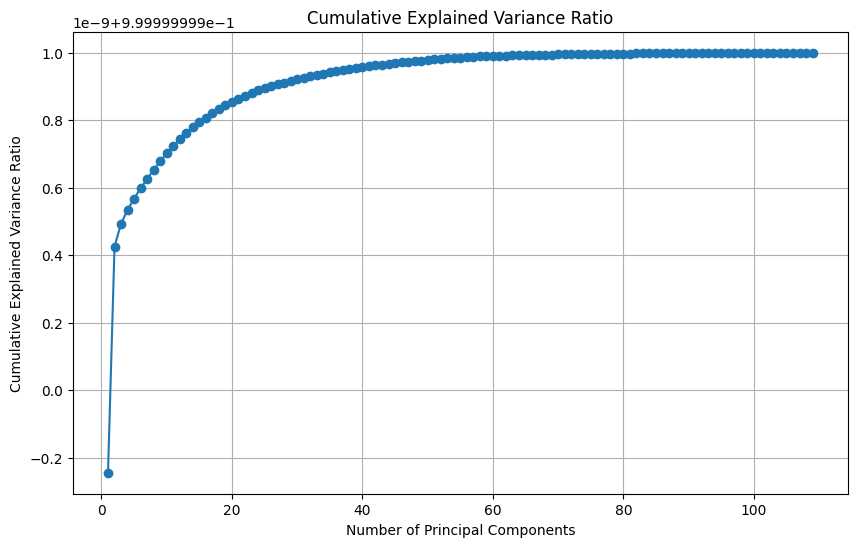

In [28]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_winsorized)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [33]:
# Evaluate model on test set
nb_accuracy_test = accuracy_score(y_test_winsorized, nb_pred)
nb_report_test = classification_report(y_test_winsorized, nb_pred, zero_division=0)

rf_accuracy_test = accuracy_score(y_test_winsorized, rf_pred)
rf_report_test = classification_report(y_test_winsorized, rf_pred, zero_division=0)

# Print evaluation metrics for test set
print("Naïve Bayes Classifier Performance on Test Set:")
print("Accuracy:", nb_accuracy_test)
print("Classification Report:\n", nb_report_test)

print("\nRandom Forest Classifier Performance on Test Set:")
print("Accuracy:", rf_accuracy_test)
print("Classification Report:\n", rf_report_test)


Naïve Bayes Classifier Performance on Test Set:
Accuracy: 0.7589313133381104
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      7414
           1       0.00      0.00      0.00      2355

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.65      9769


Random Forest Classifier Performance on Test Set:
Accuracy: 0.8260825058859658
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      7414
           1       0.66      0.57      0.61      2355

    accuracy                           0.83      9769
   macro avg       0.77      0.74      0.75      9769
weighted avg       0.82      0.83      0.82      9769



In [30]:
# Evaluate models using cross-validation
nb_cv_scores_accuracy = cross_val_score(nb_model, X_winsorized, y_winsorized, cv=5, scoring='accuracy')
rf_cv_scores_accuracy = cross_val_score(rf_model, X_winsorized, y_winsorized, cv=5, scoring='accuracy')

# Print cross-validation results
print("\nNaïve Bayes Classifier Cross-Validation Accuracy Scores:")
print(nb_cv_scores_accuracy)
print("Mean Accuracy:", nb_cv_scores_accuracy.mean())

print("\nRandom Forest Classifier Cross-Validation Accuracy Scores:")
print(rf_cv_scores_accuracy)
print("Mean Accuracy:", rf_cv_scores_accuracy.mean())


Naïve Bayes Classifier Cross-Validation Accuracy Scores:
[0.76067151 0.76067151 0.76074939 0.76074939 0.76074939]
Mean Accuracy: 0.7607182362198229

Random Forest Classifier Cross-Validation Accuracy Scores:
[0.82720852 0.82884635 0.83241196 0.82821458 0.8264742 ]
Mean Accuracy: 0.8286311209077102
